# Программирование на Python 

# Интерактивные визуализации в Plotly

*Автор: Татьяна Рогович, НИУ ВШЭ*

*Дополнила: Лика Капустина, НИУ ВШЭ, tg: @lika_kapustina*

[Содержание](#content):
- [1. Основы визуализации в Python: seaborn и matplotlib](#part1);
- [2. Простые графики в Plotly](#part2);
- [3. Работа с настройками графиков в Plotly](#part3);
- [4. Plotly Express](#partexp);
- [5. Тепловые карты с Plotly](#part4);
- [Дополнительные материалы](#parlast)

<h3>Как хорошо визуализировать данные?</h3>

Перед тем как поговорить о том, **как пользоваться визуализацией в Python**, поговорим о том, **что важно для визуализации**.

Создать хороший график, доносящий основную идею, которую вы хотите продемонстрировать – это целое исскуство. Когда мы говорим про графики, вам нужно понимать следующее:

**Что вы хотите продемонстрировать?** Это распределение одного показателя, связь между двумя переменными, или изменение во времени? В зависимости от ваших целей будет отличаться тип графика, который вы должны выбрать. Приведу пару примеров:
* Если вы хотите продемонстрировать **распределение**, подойдут [гистограмма](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html), [боксплот](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html#matplotlib.pyplot.boxplot) и др.;
* Если вы хотите продемонстрировать **изменение во времени**, подойдут [линейные графики](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html);
* Если вы хотите продемонстрировать **связь между показателями**, используйте [график рассеяния](https://matplotlib.org/stable/gallery/shapes_and_collections/scatter.html).

Если вы не уверены, какой график вам нужен, обратитесь к постеру ["Графики, которые убеждают всех"](https://fearless-mink-812.notion.site/6c5ae8ceb8b5411e907c93c9b5e6a44e#5b8bc56deab9461fb518a04b0c2d8c61). Откройте его и вы быстро соориентируйтесь, какой график подходит вам лучше всего.

**После того, как вы создали график, постарайтесь оценить – насколько адекватно ваш график описывает ваши данные?**

Есть целый ряд распространенных ошибок, которые помешают читающему график адекватно его оценить. Примеры этих ошибок:
* Некорректные шкалы графиков помешают точно оценить отличия в показателе: [пример](https://ninjatables.com/wp-content/uploads/2022/12/2-1.png) и [другой пример](https://miro.medium.com/v2/resize:fit:1280/0*zYzlWj6-4UEVWk92);
* Когда на графике вы пытаетесь отобразить слишком много значений: [пример](https://www.oldstreetsolutions.com/wp-content/uploads/2021/05/Messy-Pie-Chart-1024x712.jpg);
* Использование большого числа дополнительных параметров и декоративных элементов графиков: [пример](https://victordublog.files.wordpress.com/2016/01/639px-kc3bchlschifffahrt_bananen_exporte_20071.png?w=640);
* Ситуации, когда автор графика меняет направление шкалы, можно расценить как намеренное введение зрителя/читателя графика в заблуждение: [ссылка](https://cdn.mos.cms.futurecdn.net/h5MSdPM97fm55kTk4kk4P7-1200-80.jpg).

После обсуждения теории – перейдем к практике!

In [118]:
# сперва загрузим информацию по преступлениям по штатам США в 2005 году
import pandas as pd
import numpy as np

crimes = pd.read_csv('https://raw.githubusercontent.com/aaparshina/DDC_22-23_basics_python/main/data/crimeRatesByState2005.tsv', sep = '\t')
crimes.head(5)

,state,murder,Forcible_rate,Robbery,aggravated_assult,burglary,larceny_theft,motor_vehicle_theft,population
0,Alabama,8.2,34.3,141.4,247.8,953.8,2650.0,288.3,4627851
1,Alaska,4.8,81.1,80.9,465.1,622.5,2599.1,391.0,686293
2,Arizona,7.5,33.8,144.4,327.4,948.4,2965.2,924.4,6500180
3,Arkansas,6.7,42.9,91.1,386.8,1084.6,2711.2,262.1,2855390
4,California,6.9,26.0,176.1,317.3,693.3,1916.5,712.8,36756666


<h2>Основы визуализации в Python</h2><a name='part1'></a>

Сегодня мы с вами обсудим графики в **Plotly – это библиотека, позволяющая создавать интерактивные визуализации**. Но имеет смысл сказать и про другие, более простые решения, позволяющие визуализировать данные в Python: это библиотеки `seaborn` и `matplotlib`.

<h3><code>seaborn</code></h3>

<code>seaborn</code> – библиотека для Python, предлагающая возможности для достаточно простой визуализации данных. В отличие от других библиотек, имеет более простой синтаксис, но и предоставляет меньше возможностей по кастомизации графиков.

* Документация seaborn доступна по [ссылке](https://seaborn.pydata.org/index.html);
* Примеры графиков с кодом для реализации в seaborn доступны по [ссылке](https://seaborn.pydata.org/examples/index.html).

In [3]:
import seaborn as sns # наиболее распространенное сокращение для импорта seaborn

Давайте попытаемся оценить показатели убийств в штатах США в 2005 году (число убийств на тысячу человек населения). Для этого воспользуемся [гистограммой из пакета seaborn](https://seaborn.pydata.org/generated/seaborn.histplot.html).

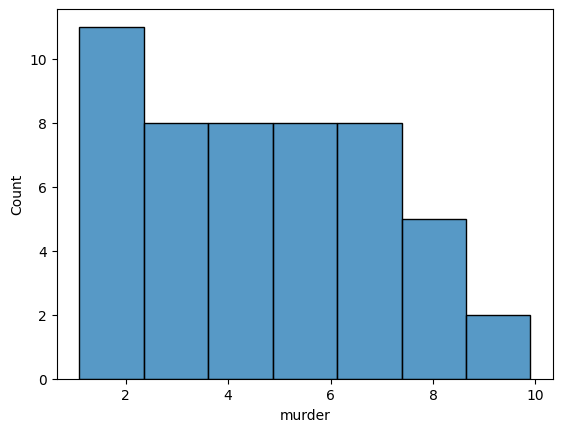

In [33]:
sns.histplot(crimes['murder']);

А теперь давайте посмотрим не на все штаты в целом, а на разные штаты по численности населения. Сперва немного отредактируем наши данные:

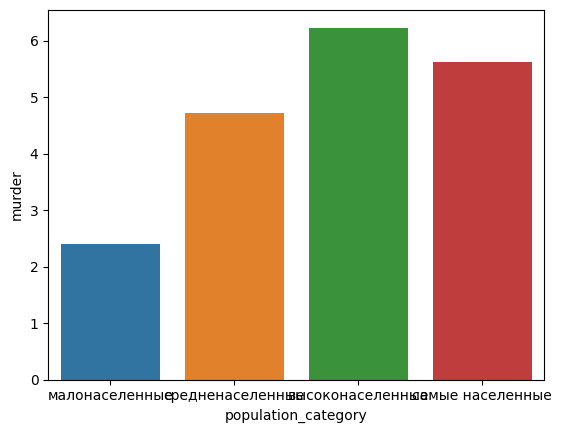

In [47]:
labels = ['малонаселенные', 'средненаселенные', 'высоконаселенные', 'самые населенные']
pop_quantiles = [crimes['population'].quantile(i) for i in [0.25, 0.5, 0.75, 1]]
pop_dict = {pop_quantiles[i]:labels[i] for i in range(len(pop_quantiles))}

# Добавим столбик с категорией населенности штата в зависимости от нахождения между квантилями;
def get_population_category(n):
    if n <= pop_quantiles[0]:
        answer = pop_dict[pop_quantiles[0]]
    elif pop_quantiles[1] >= n > pop_quantiles[0]:
        answer = pop_dict[pop_quantiles[1]]
    elif pop_quantiles[2] >= n > pop_quantiles[1]:
        answer = pop_dict[pop_quantiles[2]]
    else:
        answer = pop_dict[pop_quantiles[3]]
    return answer
crimes = crimes.sort_values(by='population')
crimes['population_category'] = crimes['population'].apply(lambda x: get_population_category(x))

g = sns.barplot(x=crimes['population_category'], y=crimes["murder"], errorbar=None);

Давайте обратим внимание на наш график выше. Он в чем-то неидеален, верно? Да, потому что названия по оси x накладываются друг на друга. Если мы попытаемся [найти решение этой ситуации](https://stackoverflow.com/questions/26540035/rotate-label-text-in-seaborn), то обнаружим, что обойтись только seaborn не получится – нам нужно использовать пакет `matplotlib`, потому что `seaborn` создан на его основе.

<h3><code>matplotlib</code></h3>

<code>matplotlib</code> – другая популярная библиотека для визуализации на Python. Она предоставляет вам больше возможностей, но является более сложной по своему синтаксису. Например, с помощью <code>matplotlib</code> вы можете изменить наклон ваших подписей, нарисовать сразу 4 графика в одном окне, нанести подписи на график и еще очень много чего.
* Документация доступна по [ссылке](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html);
* Примеры графиков в matplotlib доступны по [ссылке](https://matplotlib.org/3.5.3/gallery/index.html).

Чтобы повернуть подписи к графикам, воспользуемся <code>matplotlib</code>:

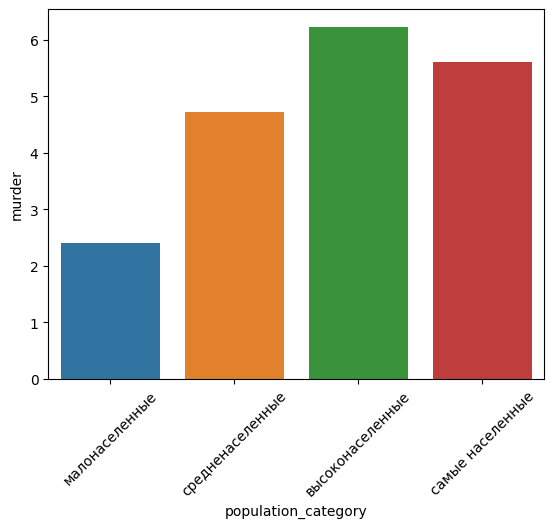

In [46]:
import matplotlib.pyplot as plt # импортируем библиотеку

g = sns.barplot(x=crimes['population_category'], y=crimes["murder"], errorbar=None);
plt.xticks(rotation=45); # поворачиваем подписи на 45 градусов

Чтобы продемонстрировать возможности `matplotlib`, сделаем следующее:
* Подпишем значения показателя по оси `Y` (`murder`) с помощью `g.bar_label()`;
* Подпишем график с помощью `plt.title()`;
* Подпишем оси y и x с помощью `plt.ylabel()` и `plt.xlabel()`.

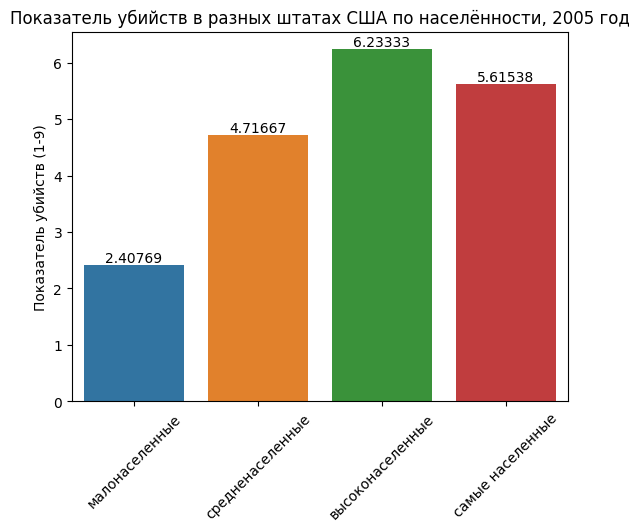

In [51]:
g = sns.barplot(x=crimes['population_category'], y=crimes["murder"], errorbar=None);
plt.xticks(rotation=45);

# Новое:
g.bar_label(g.containers[0], fontsize=10); # значения на точках 
plt.title('Показатель убийств в разных штатах США по населённости, 2005 год'); # название графика
plt.ylabel('Показатель убийств (1-9)'); # подпись оси y
plt.xlabel(''); # подпись оси x

На этом семинаре мы с вами не будем сосредотачиваться на `seaborn` и `matplotlib` – если вы успешно освоили материал курса, то можете освоить их самостоятельно. Вместо этого потратим время на `Plotly` – библиотеку, позволяющую интерактивно визуализировать данные.

<h2>Простые графики в Plotly</h2><a name='part2'></a>

Синтаксис `plotly` несколько отличается от того, что мы уже видели в `matplotlib`. 

Здесь мы передаем данные для графиков функция из библиотеки `plotly.graph_objects`, которую мы импортировали как `go`, и потом эти графики передаем функции `go.Figure`, которая собственно рендерит наш график.

Мы будем использовать оффлайн версию. Если вы хотите хранить графики в облаке, пройдите регистрацию и создание ключа для API по [ссылке](https://plot.ly/python/getting-started/#chart-studio-support).

In [ ]:
!pip install plotly # устанавливаем библиотеку

In [52]:
import plotly # импортируем библиотеку
import plotly.graph_objects as go # импортируем graph_objects как go
from plotly.subplots import make_subplots # импортируем возможность для создания под-графиков
import pandas as pd # импортируем pandas

In [58]:
our_data = [2, 3, 1] # задаем данные 

our_bar = go.Bar(y = our_data) # передаем данные объекту Bar, говорим, что наши данные, это величина категории по шкале y

fig = go.Figure(our_bar) # передаем наш бар объекту Figure, который уже рисует график (ура, что-то знакомое!)

fig.show() # выводим график

А теперь давайте представим, что наши данные разбиты по какой-то категориальной переменной:

In [59]:
trace0 = go.Bar(y = [2, 3, 1])
trace1 = go.Bar(y = [4, 7, 3])

our_data = [trace0, trace1] # когда объектов больше одного - передаем их списком

fig = go.Figure(our_data)
fig.show()

Теперь попробуем построить что-то с координатами x и y. Такой график уже будет Scatter - у каждого нашего наблюдения есть координаты x и y:

In [60]:
trace0 = go.Scatter(  
    x=[1, 2, 3, 4],
    y=[10, 15, 13, 17]
)
trace1 = go.Scatter(
    x=[1, 2, 3, 4],
    y=[16, 5, 11, 9]
)
our_data = [trace0, trace1] 

fig = go.Figure(our_data)

fig.update_layout(width=800, height=800)

fig.show()

#fig.write_image("fig1.png")

Загрузим датасет `forest` по ссылке ниже. Он содержит следующие колонки:
* `year` - год;
* `hare` - значение числа зайцев;
* `lynx` - значение числа рысей;
* `carrot` - значение числа морковок.

In [63]:
forest = pd.read_csv('https://raw.githubusercontent.com/aaparshina/PROG_22-23/main/DATA/populations.txt', sep = '\t')
forest.head(5)

,year,hare,lynx,carrot
0,1900,30000.0,4000.0,48300
1,1901,47200.0,6100.0,48200
2,1902,70200.0,9800.0,41500
3,1903,77400.0,35200.0,38200
4,1904,36300.0,59400.0,40600


Построим линейный тренд, который сравнивает популяции зайцев (`hare`) и морковки (`carrot`) за все годы:

In [74]:
# создаем объект для линии для зайцев:
trace_hare = go.Scatter(  
    x=forest['year'],
    y=forest['hare']
)
# создаем объект для линии для морковок:
trace_carrot = go.Scatter(
    x=forest['year'],
    y=forest['carrot']
)
# записываем наши объекты в список
our_data = [trace_hare, trace_carrot] 

fig = go.Figure(our_data) # визуализируем

fig.show() # демонстрируем график

Построим столбчатый график, который сравнивает общую популяцию (зайцы, рыси и морковки) с популяцией рысей по годам:

In [66]:
# Создадим барплот для отображения общего числа рысей, зайцев и морковок
trace_all = go.Bar(  
    x=forest['year'],
    y=forest['hare'] + forest['lynx'] + forest['carrot']
)

# и барплот для отображения числа рысей
trace_lynx = go.Bar(
    x=forest['year'],
    y=forest['lynx']
)
our_data = [trace_all, trace_lynx] 

fig = go.Figure(our_data)

fig.show()

А теперь давайте построим эти два графика рядом.

Обратите внимание, plotly считает с 1, а не с 0, как мы привыкли.

In [67]:
fig = make_subplots(rows=2, cols=1)

fig.add_trace(trace_carrot, row=1, col=1)
fig.add_trace(trace_hare, row=1, col=1)
fig.add_trace(trace_all, row=2, col=1)
fig.add_trace(trace_lynx, row=2, col=1)

<h2>Работа с настройками графиков в Plotly</h2><a name='part3'></a>

В plotly за данные внутри оси координаты и всю "красоту" (подписи, шкалы, фон, сетка и т.д.) отвечают два разных объекта - `data` и `layout`. 

```
fig = go.Figure(data = our_data)
```

Здесь объект `data` принимает данные, из которых `figure` построит нам график. Как мы увидим ниже, аттрибуты данных тоже настраиваются объекте данных (например, цвет или размер точек).

За внешний вид этого графика отвечает `layout` - там довольно много параметров, которые можно настроить, которые задаются через словари, где ключ - параметр, а значение - то, как мы хотим его изменить (текст, числовое значение и т.д.). 

По [ссылке](https://plot.ly/python/reference/) можно посмотреть, какие типы графиков вообще есть и какие параметры можно настраивать в каждом из них.

В объект `layout` мы передаем словарь, где ключ - ключевое слово, а значение - то, что мы ему присваиваем. Обратите внимание, в синтаксе ниже показаны три варианта, как это можно записать. Все они эквивалентны.

In [75]:
trace0 = go.Scatter(
    x=[1, 2, 3, 4],
    y=[10, 15, 13, 17]
)

our_data = [trace0]
our_layout = dict(title = 'A simple line')
# our_layout = {'title' : 'A simple line'}
# our_layout = go.Layout(title = 'A simple line')

# после того, как создали отдельно объекты и для data, и для layout, передаем их функции go.Figure()
fig = go.Figure(data=our_data, layout=our_layout)

fig.show()

Как уже говорилось, все, что внутри осей координат и касается данных - настраивается внутри объекта, относящимся к данным. 

Так в объекте `go.Scatter` (который по сути создает словарь, вообще почти все в `plotly` построено на синтаксисе словарей) мы можем прописать тип, цвет и размер маркеров, всплывающий текст и т.д.). В `layout` подписываем шкалы x и y - обратите внимание, что внутри словаря некторые параметры в свою очередь тоже словари :)

In [76]:
trace0 = go.Scatter(
    x=[1, 2, 3, 4],
    y=[10, 15, 13, 17],
    marker={'color': 'red', 'symbol': 'x-open', 'size': 10}, # аттрибуты маркера - цвет, код символа, размер
    mode = 'lines+markers', # атрибуты графика. Здесь можно задать просто линию или маркеры, например
    text = ['one', 'two', 'three', 'four'], # подписи к точкам
    name = 'Red Trace' # имя в легенде
)

our_data = [trace0]
our_layout = go.Layout(
    title="First Plot", 
    xaxis={'title':'x axis'}, # заголовки шкал
    yaxis={'title':'y axis'})

# после того, как создали отдельно объекты и для data, и для layout, передаем их функции go.Figure()
fig = go.Figure(data=our_data, layout=our_layout)

fig.show()

Давайте посмотрим, как наши объекты выглядят внутри

In [77]:
# словари словарей!
our_data

[Scatter({
     'marker': {'color': 'red', 'size': 10, 'symbol': 'x-open'},
     'mode': 'lines+markers',
     'name': 'Red Trace',
     'text': [one, two, three, four],
     'x': [1, 2, 3, 4],
     'y': [10, 15, 13, 17]
 })]

In [81]:
# при желании мы даже можем обратиться к объектам внутри по индексу
our_data[0]['marker']['color']

'red'

In [79]:
our_layout

Layout({
    'title': {'text': 'First Plot'}, 'xaxis': {'title': {'text': 'x axis'}}, 'yaxis': {'title': {'text': 'y axis'}}
})

<font size=4><b><center>Задание 1</center></b></font>

* Постройте на одном графике тренды для всех, кто живет в лесу (зайцы, рыси, морковки);
* Подпишите шкалы, поменяйте цвет всех линий, задайте название графика для легенды.

In [ ]:
# YOUR CODE HERE

**Поработаем с настройками графиков на другом примере**

Вернемся к знакомому набору данных – `crimes`.

In [86]:
# Загрузим данные
crimes = pd.read_csv('https://raw.githubusercontent.com/aaparshina/DDC_22-23_basics_python/main/data/crimeRatesByState2005.tsv', sep = '\t')
crimes.head()

,state,murder,Forcible_rate,Robbery,aggravated_assult,burglary,larceny_theft,motor_vehicle_theft,population
0,Alabama,8.2,34.3,141.4,247.8,953.8,2650.0,288.3,4627851
1,Alaska,4.8,81.1,80.9,465.1,622.5,2599.1,391.0,686293
2,Arizona,7.5,33.8,144.4,327.4,948.4,2965.2,924.4,6500180
3,Arkansas,6.7,42.9,91.1,386.8,1084.6,2711.2,262.1,2855390
4,California,6.9,26.0,176.1,317.3,693.3,1916.5,712.8,36756666


**Наша задача – построить график рассеяния для данных по преступности в США**, где:
* по шкале x будет количество убийств (`murder`);
* по шкале y - ограбления (`burglary`);
* за размер будет отвечать количество людей в штате (`population`)(возможно, нуждается в масшатабировании);
* за цвет - количество угнанных автомобилей (`motor_vehicle_theft`). 
* При наведении курсора на точку должно выводиться названия штата (обратите внимание на атрибут текст в примерах выше).

Цвет, размер, прозрачность и цветовая схема указываются в словаре аттрибутов маркера (`size`, `color`, `opacity`, `colorscale`, `showscale`).

Теперь создадим график:

In [108]:
# Создаем график
trace0 = go.Scatter(
    x = crimes['murder'], # переменная по оси x
    y = crimes['burglary'], # переменная по оси y
    mode = 'markers',
    # настройки точек
    marker = dict(size = crimes['population']//500000, # размер
                color = crimes['motor_vehicle_theft'], # цвет
                opacity = 0.7, # прозрачности
                colorscale = 'Electric', # шкала цвета
                showscale = True), # показывать ли шкалу
    text = crimes['state'],
    hovertemplate =
    '<b>%{text}</b>' +
    '<br>Murders per capita: %{x}' +
    '<br>Burglary per capita: %{y}' +
    '<br>Motor Vehicle Theft per capita: %{marker.color}' +
    '<br>Population: %{marker.size}', # как будет выглядеть подпись к каждой точке
    name = ''
    )
# Уточняем настройки отображения
layout = go.Layout(
    title='Crime in the USA', # название
    
    # ось x
    xaxis= {
        'title':'Murder rate (number per 100,000 population)', # подпись оси х
        'gridwidth':1, # широта границ
    },
    # ось y
    yaxis={
        'title':'Burglary rate (number per 100,000 population)',
        'gridwidth':1,
    }
)

fig = go.Figure(data = [trace0], layout = layout)
fig

<font size=3><b><center>Задание 2</center></b></font>

**Сделай график рассеяния для данных gapminder:**
1. Преобразуйте ВВП `gdpPercap` с помощью логарифма (используйте функцию `np.log()`)^1;
2. Создайте в вашем датасете (с помощью функции или словаря) переменную `color`, в которой каждому уникальному континенту соответствует какой-то цвет^2;
3. Отфильтруйте данные только для одного года (выберите цифру, наиболее симпатичную вам);

**Вам нужен график, где:**
1. По шкале X – логарифмированное значение ВВП (`gdpPercap`), по шкале Y – продолжительность жизни (`lifeExp`);
2. За цвет маркера отвечают континенты (`continent`);
3. За размер - население (`population`).


1: [Документация по функции np.log()](https://numpy.org/doc/stable/reference/generated/numpy.log.html);
2: [Какие цвета можно использовать в Plotly](https://community.plotly.com/t/plotly-colours-list/11730/6).

In [139]:
# данные gapminder
gapminder = pd.read_csv('https://github.com/aaparshina/PROG_22-23/raw/main/DATA/gapminderData.csv')
gapminder.head(5)

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


In [ ]:
# YOUR CODE HERE

<h2>Plotly express</h2><a name='partexp'></a>

На самом деле ценность данных gapminder, что их здорово использовать для создания анимаций. В традиционном синтаксе `plotly` это можно сделать, но сейчас мы воспользуемся библиотекой [plotly.express](https://plot.ly/python/plotly-express/).

Это библиотека, которая специально была сделана для "быстрых" визуализаций. Я думаю, вы заметили, что синтаксис `plotly` достаточно громоздкий по сравнению с `matplotlib`. Но он и более гибкий. `Plotly.express` больше похожа на `matplotlib`, и анимацию мы сделаем именно в ней, потому что здесь это сильно проще.

Как делать анимации в традиционном `plotly` – [ссылка](https://plot.ly/python/v3/gapminder-example/#create-frames).

In [168]:
import plotly.express as px

# какая переменная отвечает за анимацию?

px.scatter(gapminder, x="gdpPercap", y="lifeExp", animation_frame="year",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])

<h2>Тепловые карты с Plotly</h2><a name='part4'></a>

Также в `plotly` можно создавать интерактивные тепловые карты. Для этого используем функцию `Choropleth`.

Параметр `location mode` принимает значения, которые будут отвечать за географические данные, а `locations` - уже собственно переменную. Если у вас есть набор данных, где колонка с географическими словарями совпадает с внутренним словарем `plotly`, то даже почти ничего не нужно делать, все распознается автоматически.

Параметр `z` - данные, которые наносим на тепловую шкалу.

* Почитать больше про тепловые карты: https://plot.ly/python/choropleth-maps/
* И про все виды интерактивных карт в plotly: https://plot.ly/python/maps/

In [170]:
trace0 = go.Choropleth(
    locationmode = 'country names',
    locations = gapminder_2007['country'],
    text = gapminder_2007['country'],
    z = gapminder_2007['lifeExp']
)

fig = go.Figure(data = [trace0])
fig

In [32]:
fig.write_html("file.html")

<h2>Дополнительные материалы</h2><a name='parlast'></a>

+ Документация seaborn: [ссылка](https://seaborn.pydata.org);
+ Документация matplotlib: [ссылка](https://matplotlib.org/stable/index.html);
+ Документация plotly express: [ссылка](https://plotly.com/python/plotly-express/);
+ Документация plotly: [ссылка](https://plotly.com/python/);
+ Примеры графиков plotly: [ссылка](https://plot.ly/python/reference/);
+ Тепловые карты в plotly: [ссылка](https://plot.ly/python/choropleth-maps/);
+ Анимации в plotly: [ссылка](https://plot.ly/python/v3/gapminder-example/#create-frames);
+ Получение токена для API plotly для сохранения графиков онлайн: [ссылка](https://plot.ly/python/getting-started/#chart-studio-support);
+ Постер ["Графики, которые убеждают всех"](https://fearless-mink-812.notion.site/6c5ae8ceb8b5411e907c93c9b5e6a44e#5b8bc56deab9461fb518a04b0c2d8c61);